In [83]:
import numpy as np
import matplotlib.pyplot as plt

import linear_classifer
import metrics

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
(0.3994887 - 1.) / 3

-0.20017043333333331

In [3]:
(0.3994887 - 1.) / 3

-0.20017043333333331

In [4]:
(0.14696405 - 0.) / 3

0.04898801666666667

In [5]:
asdf = np.array(
    [[ 2., -1., -1.,  1.],
    [ 0.,  1.,  1.,  1.],
    [ 1.,  2., -1.,  2.]]
)
rmax = np.max(asdf, axis=1, keepdims=True)
rmax
asdf - rmax

array([[ 0., -3., -3., -1.],
       [-1.,  0.,  0.,  0.],
       [-1.,  0., -3.,  0.]])

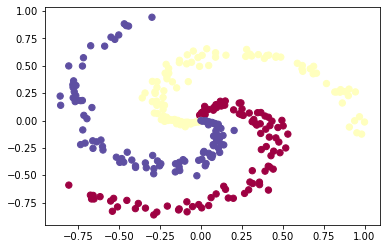

In [6]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [7]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-1
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):

    # evaluate class scores, [N x K]
    scores = np.dot(X, W) + b

    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

    # compute the loss: average cross-entropy loss and regularization
    correct_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(correct_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
    if i % 10 == 0:
        print("iteration %d: loss %f" % (i, loss)) 
        
    # compute the gradient on scores
#     dscores = probs.copy()
#     dscores[range(num_examples),y] -= 1
#     dscores /= num_examples
    _, dscores = linear_classifer.softmax_with_cross_entropy(scores, y)
    
#     if i == 2:
#         break

    # backpropate the gradient to the parameters (W,b)
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)

    dW += reg*W # regularization gradient

    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db

iteration 0: loss 1.098152
iteration 10: loss 1.069165
iteration 20: loss 1.043289
iteration 30: loss 1.020148
iteration 40: loss 0.999411
iteration 50: loss 0.980790
iteration 60: loss 0.964030
iteration 70: loss 0.948910
iteration 80: loss 0.935237
iteration 90: loss 0.922844
iteration 100: loss 0.911585
iteration 110: loss 0.901333
iteration 120: loss 0.891978
iteration 130: loss 0.883421
iteration 140: loss 0.875580
iteration 150: loss 0.868380
iteration 160: loss 0.861756
iteration 170: loss 0.855650
iteration 180: loss 0.850012
iteration 190: loss 0.844798


In [8]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.50


In [9]:
linear_classifer.softmax(scores)[:10, ]

array([[0.33047541, 0.33651326, 0.33301133],
       [0.32685482, 0.34099826, 0.33214691],
       [0.32231391, 0.34421524, 0.33347086],
       [0.32101428, 0.35068538, 0.32830034],
       [0.31896877, 0.35564442, 0.32538682],
       [0.31031851, 0.35610908, 0.33357241],
       [0.31385043, 0.36541711, 0.32073246],
       [0.30439178, 0.36753197, 0.32807625],
       [0.30231887, 0.37349744, 0.32418368],
       [0.3021089 , 0.37979262, 0.31809848]])

In [10]:
# logits = np.array([-10, 0, 10])
logits = scores[0:2, :]
if len(logits.shape) == 1:
    logits = logits.reshape(1, -1)
shifted = logits - np.max(logits, axis=1, keepdims=True)
exponents = np.exp(shifted)
res = exponents / np.sum(exponents, axis=1, keepdims=True)
res[:10, ]

array([[0.33047541, 0.33651326, 0.33301133],
       [0.32685482, 0.34099826, 0.33214691]])

In [11]:
probs[:10, ]

array([[0.33048872, 0.3365207 , 0.33299058],
       [0.3268795 , 0.34099172, 0.33212878],
       [0.3223531 , 0.34419811, 0.33344879],
       [0.32105696, 0.35064888, 0.32829416],
       [0.31901764, 0.35559269, 0.32538966],
       [0.31039518, 0.35605385, 0.33355096],
       [0.31391514, 0.36533486, 0.32075   ],
       [0.30448633, 0.367441  , 0.32807268],
       [0.30241962, 0.37338788, 0.3241925 ],
       [0.30221017, 0.37966385, 0.31812598]])

In [12]:
data_loss

0.8380413005523392

In [13]:
linear_classifer.cross_entropy_loss(probs, y)

0.8380413005523392

In [14]:
np.mean(-np.log(probs[np.arange(num_examples), y]))

0.8380413005523392

In [15]:
dscores[-10:, ]

array([[ 0.00027938,  0.00162347, -0.00190286],
       [ 0.00031036,  0.00118944, -0.0014998 ],
       [ 0.00026566,  0.00170406, -0.00196972],
       [ 0.00026609,  0.00162116, -0.00188725],
       [ 0.0003169 ,  0.00100749, -0.00132439],
       [ 0.00027444,  0.00137184, -0.00164628],
       [ 0.00024008,  0.00187975, -0.00211983],
       [ 0.00023652,  0.00186823, -0.00210475],
       [ 0.00022306,  0.00214176, -0.00236482],
       [ 0.00022834,  0.00187429, -0.00210262]])

In [16]:
_, g = linear_classifer.softmax_with_cross_entropy(scores, y)
print(g[-10:, ])

[[ 0.00027795  0.00162462 -0.00190257]
 [ 0.00030887  0.00118918 -0.00149805]
 [ 0.00026425  0.00170545 -0.0019697 ]
 [ 0.00026468  0.00162228 -0.00188695]
 [ 0.00031537  0.0010067  -0.00132207]
 [ 0.00027301  0.00137212 -0.00164513]
 [ 0.0002387   0.00188165 -0.00212036]
 [ 0.00023516  0.00187008 -0.00210524]
 [ 0.0002217   0.00214437 -0.00236606]
 [ 0.00022699  0.00187614 -0.00210313]]


In [17]:
_, asd = linear_classifer.softmax_with_cross_entropy(scores, y)
print(asd[-10:, ])

[[ 0.00027795  0.00162462 -0.00190257]
 [ 0.00030887  0.00118918 -0.00149805]
 [ 0.00026425  0.00170545 -0.0019697 ]
 [ 0.00026468  0.00162228 -0.00188695]
 [ 0.00031537  0.0010067  -0.00132207]
 [ 0.00027301  0.00137212 -0.00164513]
 [ 0.0002387   0.00188165 -0.00212036]
 [ 0.00023516  0.00187008 -0.00210524]
 [ 0.0002217   0.00214437 -0.00236606]
 [ 0.00022699  0.00187614 -0.00210313]]


In [18]:
np.all(np.isclose(asd, g))

True

In [19]:
np.all(np.isclose(dscores, g, atol=step_size / 10000))

True

In [20]:
# gx_right = 1.8836208511110304
# gx_left = 1.883621402050669
# (gx_right - gx_left) / (2 * 1e-5)

In [21]:
# xr = \
# np.array([[ 2.     , -1.     ,  1.00001, -1.     ],
#        [ 1.     , -1.     , -1.     ,  0.     ],
#        [-1.     ,  0.     ,  2.     ,  1.     ]])
# xl = \
# np.array([[ 2.     , -1.     ,  0.99999, -1.     ],
#        [ 1.     , -1.     , -1.     ,  0.     ],
#        [-1.     ,  0.     ,  2.     ,  1.     ]])
# gx_right = linear_classifer.softmax_with_cross_entropy(xr, target_index)[0]
# gx_left = linear_classifer.softmax_with_cross_entropy(xl, target_index)[0]
# (gx_right - gx_left) / (2 * 1e-5)

In [22]:
probs = np.array([
    [0.2, 0.3, 0.5],
    [0.2, 0.3, 0.4],
    [0.2, 0.2, 0.3],
    [0.1, 0.2, 0.3],
])
target_index = np.array([
    1,
    2,
    2,
    0,
])

b = probs.shape[0]
k = probs.shape[1]
target = np.zeros((b, k), dtype=np.float)
target[np.arange(b), target_index.flatten()] = 1.
grad = (probs - target) #/ b
grad

array([[ 0.2, -0.7,  0.5],
       [ 0.2,  0.3, -0.6],
       [ 0.2,  0.2, -0.7],
       [-0.9,  0.2,  0.3]])

In [23]:
num_examples = b
# y = target_index
dscores = probs.copy()
dscores[range(num_examples),target_index] -= 1
# dscores /= num_examples
dscores

array([[ 0.2, -0.7,  0.5],
       [ 0.2,  0.3, -0.6],
       [ 0.2,  0.2, -0.7],
       [-0.9,  0.2,  0.3]])

In [24]:
list(range(num_examples))

[0, 1, 2, 3]

In [25]:
np.random.randint(0, 3, size=(b, 1)).astype(np.int)

array([[0],
       [1],
       [0],
       [0]])

In [29]:
a = np.array([[1, 1], [2, 0], [0, 1]])
b = np.array([[1, 0, 0, 3], [1, 0, 0, 1]])
np.dot(a, b)

array([[2, 0, 0, 4],
       [2, 0, 0, 6],
       [1, 0, 0, 1]])

In [30]:
print(a.shape, b.shape, np.dot(a, b).shape)

(3, 2) (2, 4) (3, 4)


In [31]:
np.dot(b, a)

ValueError: shapes (2,4) and (3,2) not aligned: 4 (dim 1) != 3 (dim 0)

In [43]:
batch_size = 100
num_train = X.shape[0]
num_features = X.shape[1]
num_classes = np.max(y) + 1

shuffled_indices = np.arange(num_train)
np.random.shuffle(shuffled_indices)
sections = np.arange(batch_size, num_train, batch_size)
batches_indices = np.array_split(shuffled_indices, sections)

In [97]:
ground_truth = np.array([1, 0, 0, 1])
prediction =   np.array([0, 1, 1, 1])
joint = np.hstack([ground_truth.reshape(-1, 1), prediction.reshape(-1, 1)])
TN = np.sum((joint[:, 0] == 0) & (joint[:, 1] == 0))
FP = np.sum((joint[:, 0] == 0) & (joint[:, 1] == 1))
FN = np.sum((joint[:, 0] == 1) & (joint[:, 1] == 0))
TP = np.sum((joint[:, 0] == 1) & (joint[:, 1] == 1))

In [98]:
print(metrics.binary_classification_metrics(prediction, ground_truth))

from sklearn.metrics import classification_report

print(classification_report(ground_truth, prediction))

(0.3333333333333333, 0.5, 0.4, 0.25)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      0.50      0.40         2

    accuracy                           0.25         4
   macro avg       0.17      0.25      0.20         4
weighted avg       0.17      0.25      0.20         4



In [101]:
np.trace(joint[:2, :2])

2